<img>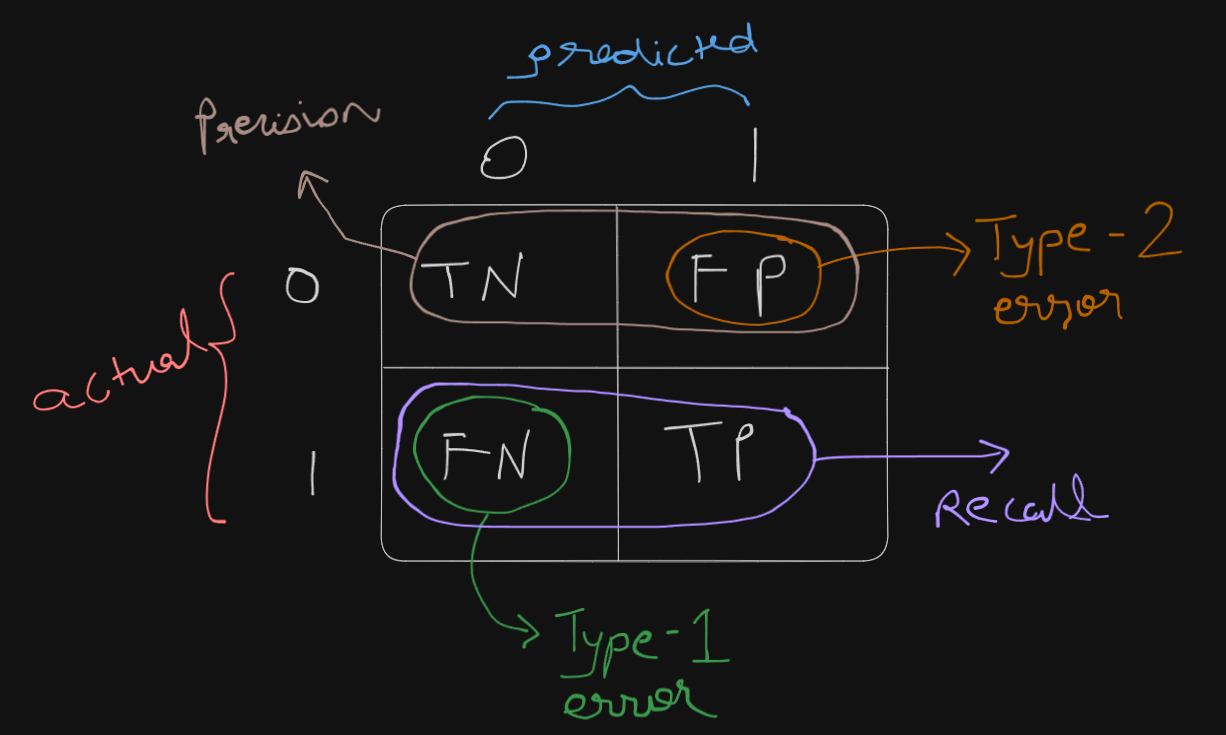

- **TPR** : TP/(TP+FN) ;; Positive Recall ;; How may goods you were to identify as good.
- **FPR** : FP/(FP+TN) ;; How many bads were you able to identify as good.
- **Sensitivity** : TPR.
- **Specificity** = 1 - FPR --> 1 - FP / (FP + FN) = TN / (FP + TN)

# AUC — Area Under Curve

- prob of giving the correct classification
- check threshold and then DT
- if we decrease the threshold level for decision making, the FP will increase 
- Eg. Diabetic first threshold is 0.5, then 0.4 then 0.6
- On lowering the threshold probability:
    - Sensitivity ⬆ , Specificity  ⬇
- On increasing the threshold probability:
    - Sensitivity ⬇ , Specificity ⬆

In [4]:
import pandas as pd
import numpy as np
import os
from numpy import random
import scipy 
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from random import choice
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion  as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

In [5]:
from sklearn.metrics import roc_auc_score

In [6]:
y_true = [1,1,0,0,1,0]
y_pred = [0.93,0.89,0.85,0.81,0.78,0.70]

np.round(roc_auc_score(y_true, y_pred), 3) # Area under the curve

0.778

[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tp= 10
tn= 0
fn= 0
fp= 10
TPR= 1.0
FPR= 1.0
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
tp= 10
tn= 1
fn= 0
fp= 9
TPR= 1.0
FPR= 0.9
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
tp= 10
tn= 2
fn= 0
fp= 8
TPR= 1.0
FPR= 0.8
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
tp= 10
tn= 3
fn= 0
fp= 7
TPR= 1.0
FPR= 0.7
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
tp= 10
tn= 4
fn= 0
fp= 6
TPR= 1.0
FPR= 0.6
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
tp= 10
tn= 5
fn= 0
fp= 5
TPR= 1.0
FPR= 0.5
[1, 1, 0,

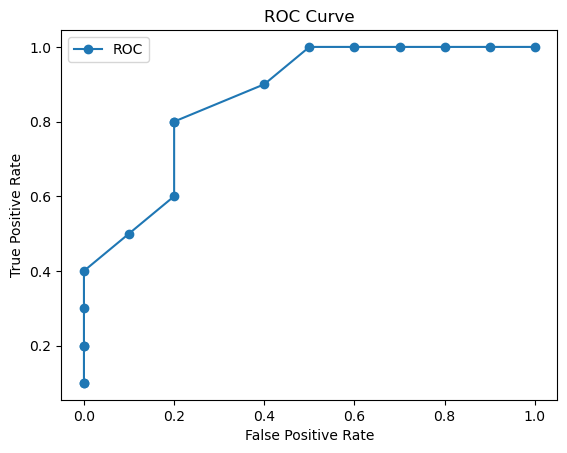

In [7]:
import matplotlib
from matplotlib import pyplot as plt
true_labels =[1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0]
pred_prob = [0.93,0.45,0.23,0.68,0.18,0.38,0.45,0.52,0.57,0.56,0.38,0.53,0.65,0.62,0.28,0.74,0.32,0.41,0.81,0.15]

def ConfMatrix(num):
    pred_label = []
    tp=0
    tn=0
    fp=0
    fn=0
    for ctr in range(len(true_labels)):
        if pred_prob[ctr]>num:
            pred_label.append(1)
        else:
            pred_label.append(0)
        
        if true_labels[ctr] == 1 and pred_label[ctr] == 1:
            tp=tp+1
        elif true_labels[ctr] == 0 and pred_label[ctr] == 0:
            tn=tn+1
        elif true_labels[ctr] == 1 and pred_label[ctr] == 0:
            fn=fn+1
        elif true_labels[ctr] == 0 and pred_label[ctr] == 1:
            fp=fp+1
            
    print(true_labels)
    print(pred_label)
    print('tp=',tp)
    print('tn=',tn)
    print('fn=',fn)
    print('fp=',fp)
    TPR = tp/(tp+fn)
    FPR = fp/(fp+tn)
    print('TPR=',TPR)
    print('FPR=',FPR)
    return(TPR,FPR)


def MakeGraph():
    vals = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
    tpr_rate = []
    fpr_rate = []
    for ctr in vals:
        r = ConfMatrix(ctr)
        tpr_rate.append(r[0])
        fpr_rate.append(r[1])
    import matplotlib
    from matplotlib import pyplot as plt
    plt.plot(fpr_rate, tpr_rate, 'o-',label='ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

MakeGraph()


In [8]:
import numpy as np
from sklearn.metrics import roc_auc_score
 
true_labels =[1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0]
pred_prob = [0.93,0.45,0.23,0.68,0.18,0.38,0.45,0.52,0.57,0.56,0.38,0.53,0.65,0.62,0.28,0.74,0.32,0.41,0.81,0.15]
auc = np.round(roc_auc_score(true_labels, pred_prob), 3)
print(auc)

0.86


In [ ]:
import matplotlib
from matplotlib import pyplot as plt
true_labels =[1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0]
pred_prob = [0.93,0.45,0.23,0.68,0.18,0.38,0.45,0.52,0.57,0.56,0.38,0.53,0.65,0.62,0.28,0.74,0.32,0.41,0.81,0.15]

def ConfMatrix(num):
    pred_label = []
    tp=0
    tn=0
    fp=0
    fn=0
    for ctr in range(len(true_labels)):
        if pred_prob[ctr]>num:
            pred_label.append(1)
        else:
            pred_label.append(0)
        
        if true_labels[ctr] == 1 and pred_label[ctr] == 1:
            tp=tp+1
        elif true_labels[ctr] == 0 and pred_label[ctr] == 0:
            tn=tn+1
        elif true_labels[ctr] == 1 and pred_label[ctr] == 0:
            fn=fn+1
        elif true_labels[ctr] == 0 and pred_label[ctr] == 1:
            fp=fp+1
            
    print(true_labels)
    print(pred_label)
    print('tp=',tp)
    print('tn=',tn)
    print('fn=',fn)
    print('fp=',fp)
    TPR = tp/(tp+fn)
    FPR = fp/(fp+tn)
    print('TPR=',TPR)
    print('FPR=',FPR)
    return(TPR,FPR, fn, fp, tn, tp)


def MakeDataframe():
    vals = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
    fn_val = []
    fp_val = []
    tn_val = []
    tp_val = []
    tpr_rate = []
    fpr_rate = []
    for ctr in vals:
        r = ConfMatrix(ctr)
        tpr_rate.append(r[0])
        fpr_rate.append(r[1])
        fn_val.append(r[2])
        fp_val.append(r[3])
        tn_val.append(r[4])
        tp_val.append(r[5])


    data = {
        "Threshold" : vals,
        "TN" : tn_val,
        "TP" : tp_val,
        "FN" : fn_val,
        "FP" : fp_val
    }

    df = pd.DataFrame(data)

    return df


ans = MakeDataframe()


In [27]:
ans

,Threshold,TN,TP,FN,FP
0,0.10,0,10,0,10
1,0.15,1,10,0,9
2,0.20,2,10,0,8
3,0.25,3,10,0,7
4,0.30,4,10,0,6
5,0.35,5,10,0,5
6,0.40,6,9,1,4
7,0.45,8,8,2,2
8,0.50,8,8,2,2
9,0.55,8,6,4,2


- Here, **(TP + FN)** will always be equal to 10 i.e. as threshold increases, *TP* will decrease and *FN* will increase.
- **(TN + FP)** will always be equal to 10 i.e. as threshold increases, *TN* will increase and *FP* will decrease.
- Eg. take it of Diabeties